## Transaction table
“It contains money transfer and also other gifting goods and service, like you booked a ticket for others, etc.”

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
“TransactionDT first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so I think the unit is seconds. Using this, we know the data spans 6 months, as the maximum value is 15811131, which would correspond to day 183.”

TransactionAMT: transaction payment amount in USD
“Some of the transaction amounts have three decimal places to the right of the decimal point. There seems to be a link to three decimal places and a blank addr1 and addr2 field. Is it possible that these are foreign transactions and that, for example, the 75.887 in row 12 is the result of multiplying a foreign currency amount by an exchange rate?”

ProductCD: product code, the product for each transaction
“Product isn't necessary to be a real 'product' (like one item to be added to the shopping cart). It could be any kind of service.”

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address
“both addresses are for purchaser
addr1 as billing region
addr2 as billing country”
dist: distance
"distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.”
P_ and (R__) emaildomain: purchaser and recipient email domain
“ certain transactions don't need recipient, so R_emaildomain is null.”
C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
“Can you please give more examples of counts in the variables C1-15? Would these be like counts of phone numbers, email addresses, names associated with the user? I can't think of 15.
Your guess is good, plus like device, ipaddr, billingaddr, etc. Also these are for both purchaser and recipient, which doubles the number.”
D1-D15: timedelta, such as days between previous transaction, etc.
M1-M9: match, such as names on card and address, etc.
Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.
“For example, how many times the payment card associated with a IP and email or address appeared in 24 hours time range, etc.”
"All Vesta features were derived as numerical. some of them are count of orders within a clustering, a time-period or condition, so the value is finite and has ordering (or ranking). I wouldn't recommend to treat any of them as categorical. If any of them resulted in binary by chance, it maybe worth trying."


## Identity Table 
Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

DeviceInfo : https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#583227

“id01 to id11 are numerical features for identity, which is collected by Vesta and security partners such as device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page, etc. All of these are not able to elaborate due to security partner T&C. I hope you could get basic meaning of these features, and by mentioning them as numerical/categorical, you won't deal with them inappropriately.”

In [1]:
# # importing required modules 
# from zipfile import ZipFile 
  
# # specifying the zip file name 
# file_name = "../../../Desktop/ieee-fraud-detection.zip"
  
# # opening the zip file in READ mode 
# with ZipFile(file_name, 'r') as zip: 
#     # printing all the contents of the zip file 
#     zip.printdir() 
#     # extracting all the files 
#     print('Extracting all the files now...') 
#     zip.extractall() 
#     print('Done!')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)

In [3]:
path='../../Desktop/ieee-fraud-detection/'

In [4]:
train_identity=pd.read_csv(path+'train_identity.csv')
train_transaction=pd.read_csv(path+'train_transaction.csv')
test_identity=pd.read_csv(path+'test_identity.csv')
test_transaction=pd.read_csv(path+'test_transaction.csv')

In [5]:
train_identity.shape

(144233, 41)

In [6]:
train_transaction.shape

(590540, 394)

In [7]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [8]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [9]:
#join 2 datasets into one combined dataframe
transaction_df=train_transaction.copy()
identity_df=train_identity.copy()
merge_df=transaction_df.merge(identity_df,on='TransactionID',how='left')

In [10]:
merge_df.shape

(590540, 434)

In [11]:
merge_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

In [12]:
merge_df.groupby('isFraud').size()

isFraud
0    569877
1     20663
dtype: int64

In [13]:
print('Fraud Rate in train set is {:.2%}'.format(merge_df.isFraud.mean()))

Fraud Rate in train set is 3.50%


This is unbalanced dataset and need to do upsampling or downsampling later

## EDA

In [14]:
#Check the data types of all features from train_transaction and train_identity
merge_df.info()
# float64(399), int64(4), object(31)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [15]:
merge_df_new=merge_df.loc[:,list(merge_df.isnull().mean()<=0.5)]

In [16]:
merge_df_new.info()
#float64(207), int64(4), object(9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 220 entries, TransactionID to V321
dtypes: float64(207), int64(4), object(9)
memory usage: 995.7+ MB


In [17]:
round(len(list(merge_df_new))/merge_df.shape[1],2)

0.51

Removed 49% attributes in combined set with missing values% more than 50%

For the new set, only 9 attributes are object. Let's look at the unique values of each categorical attribute and then we can decide the imputing strategies 

In [18]:
for i in list(merge_df_new.select_dtypes(include='object')):
    print(i,merge_df_new[i].nunique())

ProductCD 5
card4 4
card6 4
P_emaildomain 59
M1 2
M2 2
M3 2
M4 3
M6 2


In [19]:
for i in list(merge_df_new.select_dtypes(include='object')):
    print(i,merge_df_new[i].value_counts().head(8))
    print('\n')

ProductCD W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64


card4 visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64


card6 debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64


P_emaildomain gmail.com        228355
yahoo.com        100934
hotmail.com       45250
anonymous.com     36998
aol.com           28289
comcast.net        7888
icloud.com         6267
outlook.com        5096
Name: P_emaildomain, dtype: int64


M1 T    319415
F        25
Name: M1, dtype: int64


M2 T    285468
F     33972
Name: M2, dtype: int64


M3 T    251731
F     67709
Name: M3, dtype: int64


M4 M0    196405
M2     59865
M1     52826
Name: M4, dtype: int64


M6 F    227856
T    193324
Name: M6, dtype: int64




**Imputation Strategies:**

* 1. For ProductCD,card4,card6 and M4 those 4 features, we will create new category 'unknown' for imputation
* 2. For P_emaildomain we have 59 unique values, thus we will use target encoding and transform it to 2 numerical attributes:domain_total and domain_fraud_rate first and then impute using median
* 3. For the remaing categorical features, they are binary attribute and we will replace T with 1 and F with 0 
* 4. For all the numerical features, impute using median 

## Imputation of missing values¶

In [20]:
df=merge_df_new.copy()

In [21]:
binary_list=['M1','M2','M3','M6']
onehot_list=['ProductCD','card4','card6','M4']
target_list=['P_emaildomain']

In [22]:
#imputation 
def imputation_sta(df,binary_list,onehot_list,target_list):
    #for target list
    for i in target_list:
        encoding=df.groupby(i).agg({'TransactionID':['count'],'isFraud':[np.sum]}).reset_index()
        encoding.columns=[i,i+'_'+'total',i+'_'+'fraud']
        encoding[i+'_'+'fraud_rate']=encoding[i+'_'+'fraud']/encoding[i+'_'+'total']
        #impute 2 new target encoding columns using median
        encoding[i+'_'+'total'].fillna(encoding[i+'_'+'total'].median(),inplace=True)
        encoding[i+'_'+'fraud_rate'].fillna(encoding[i+'_'+'fraud_rate'].median(),inplace=True)
        df=df.merge(encoding,on=i,how='left')
        df.drop([i,i+'_'+'fraud'],axis=1,inplace=True)
    
    #for one hot encoder list
    for i in onehot_list:
        df[i].fillna('unknown',inplace=True)
        
   #for binary list
    for i in binary_list:
        df[i].fillna(df[i].mode()[0],inplace=True)
        df[i]= df[i].replace({'T':1,'F':0})
    
    #for numerical list
    for i in list(df.select_dtypes(exclude='object')):
        df[i].fillna(df[i].median(),inplace=True)
        
    return df

In [23]:
df_impute=imputation_sta(df,binary_list,onehot_list,target_list)

In [24]:
df_impute[binary_list].head()

,M1,M2,M3,M6
0,1,1,1,1
1,1,1,1,1
2,1,1,1,0
3,1,1,1,0
4,1,1,1,0


In [25]:
for i in list(df_impute.select_dtypes(include='object')):
    print(i,df_impute[i].value_counts().head(8))
    print('\n')

ProductCD W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64


card4 visa                384767
mastercard          189217
american express      8328
discover              6651
unknown               1577
Name: card4, dtype: int64


card6 debit              439938
credit             148986
unknown              1571
debit or credit        30
charge card            15
Name: card6, dtype: int64


M4 unknown    281444
M0         196405
M2          59865
M1          52826
Name: M4, dtype: int64




In [26]:
for i in list(df_impute):
    print(i,df_impute[i].isnull().sum())

TransactionID 0
isFraud 0
TransactionDT 0
TransactionAmt 0
ProductCD 0
card1 0
card2 0
card3 0
card4 0
card5 0
card6 0
addr1 0
addr2 0
C1 0
C2 0
C3 0
C4 0
C5 0
C6 0
C7 0
C8 0
C9 0
C10 0
C11 0
C12 0
C13 0
C14 0
D1 0
D2 0
D3 0
D4 0
D10 0
D11 0
D15 0
M1 0
M2 0
M3 0
M4 0
M6 0
V1 0
V2 0
V3 0
V4 0
V5 0
V6 0
V7 0
V8 0
V9 0
V10 0
V11 0
V12 0
V13 0
V14 0
V15 0
V16 0
V17 0
V18 0
V19 0
V20 0
V21 0
V22 0
V23 0
V24 0
V25 0
V26 0
V27 0
V28 0
V29 0
V30 0
V31 0
V32 0
V33 0
V34 0
V35 0
V36 0
V37 0
V38 0
V39 0
V40 0
V41 0
V42 0
V43 0
V44 0
V45 0
V46 0
V47 0
V48 0
V49 0
V50 0
V51 0
V52 0
V53 0
V54 0
V55 0
V56 0
V57 0
V58 0
V59 0
V60 0
V61 0
V62 0
V63 0
V64 0
V65 0
V66 0
V67 0
V68 0
V69 0
V70 0
V71 0
V72 0
V73 0
V74 0
V75 0
V76 0
V77 0
V78 0
V79 0
V80 0
V81 0
V82 0
V83 0
V84 0
V85 0
V86 0
V87 0
V88 0
V89 0
V90 0
V91 0
V92 0
V93 0
V94 0
V95 0
V96 0
V97 0
V98 0
V99 0
V100 0
V101 0
V102 0
V103 0
V104 0
V105 0
V106 0
V107 0
V108 0
V109 0
V110 0
V111 0
V112 0
V113 0
V114 0
V115 0
V116 0
V117 0
V118 0
V119 0
V1

### Plot some visualization 
#### First numerical attributes

In [27]:
merge_df_new.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,514518.000000,311253.000000,501427.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590528.000000,590528.000000,589271.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,589271.000000,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.2788

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


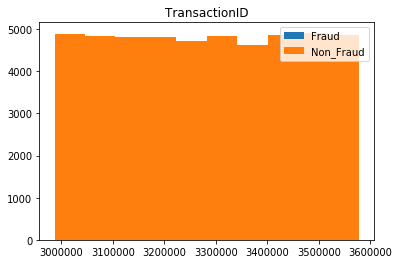

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


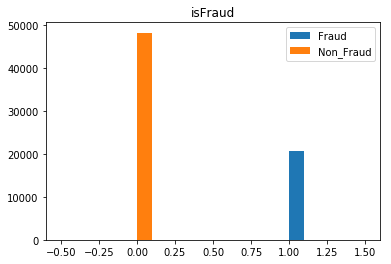

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


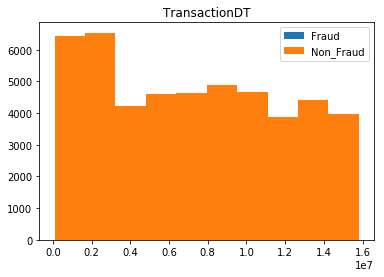

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


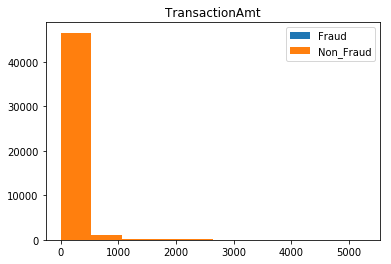

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


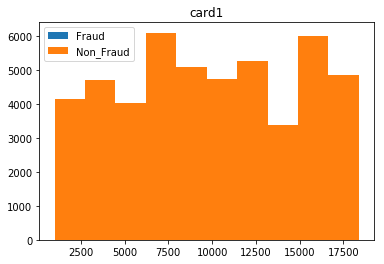

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


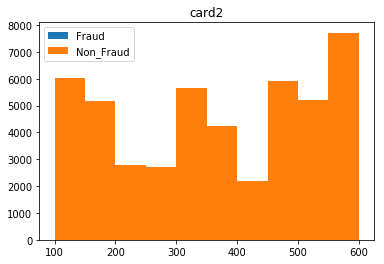

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


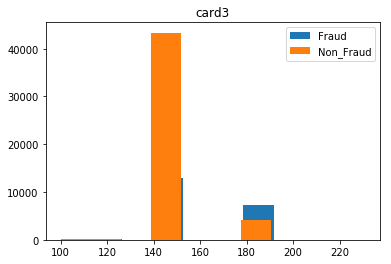

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


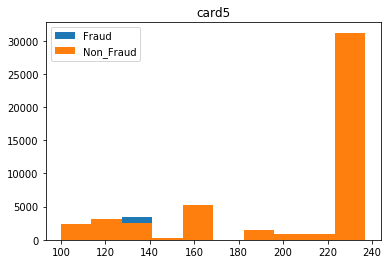

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


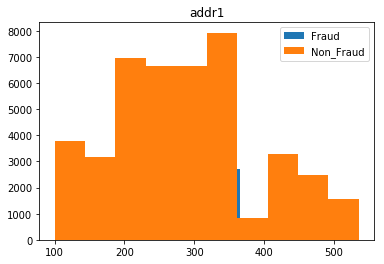

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


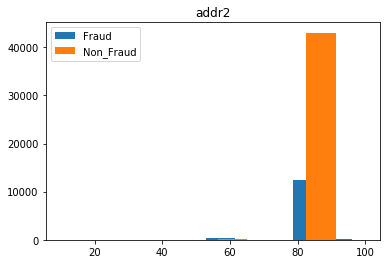

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


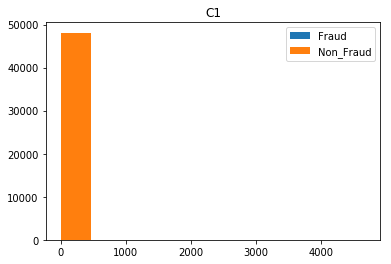

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


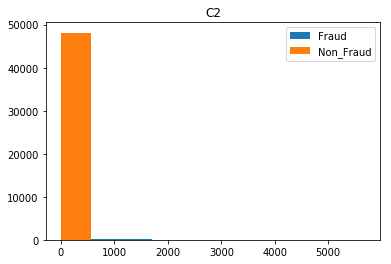

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


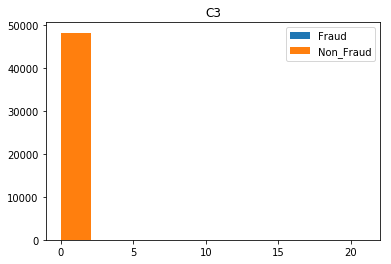

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


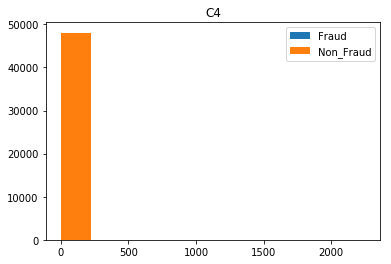

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


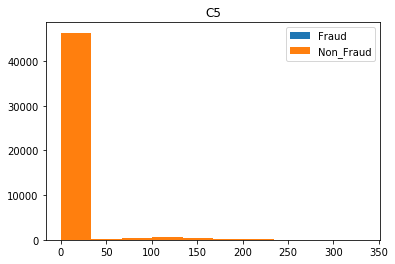

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


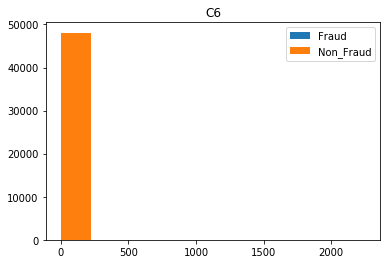

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


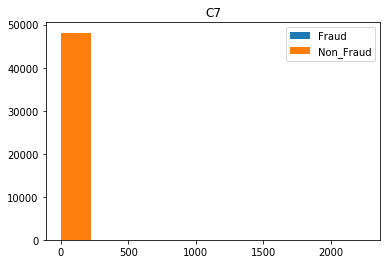

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


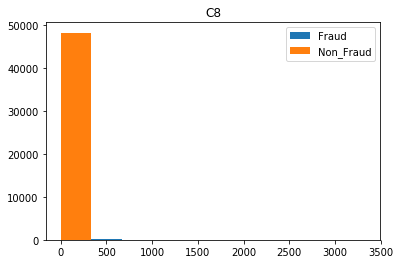

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


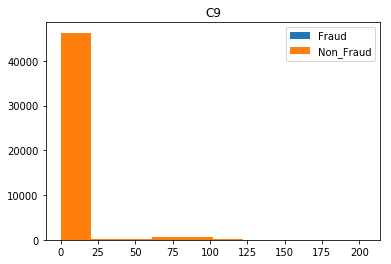

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


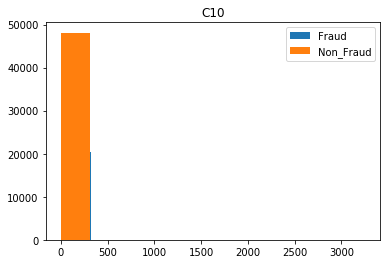

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


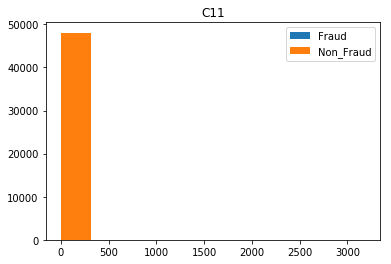

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


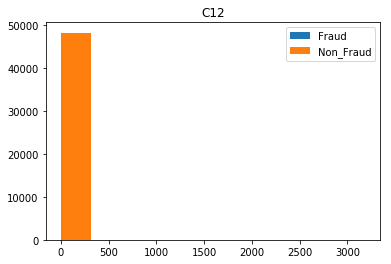

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


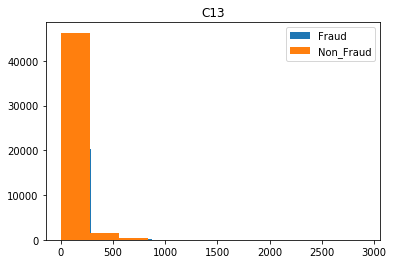

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


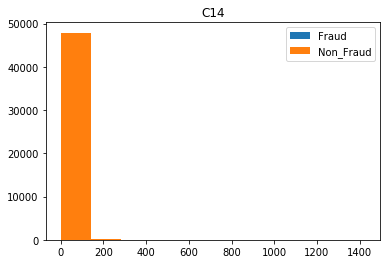

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


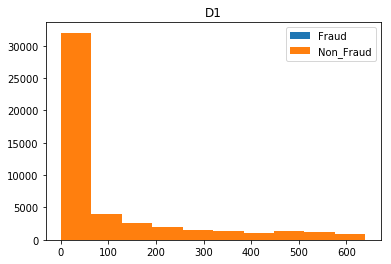

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


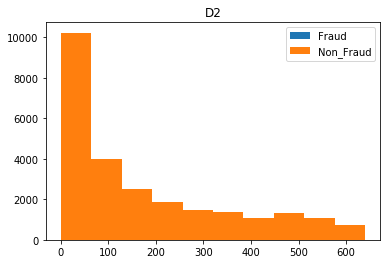

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


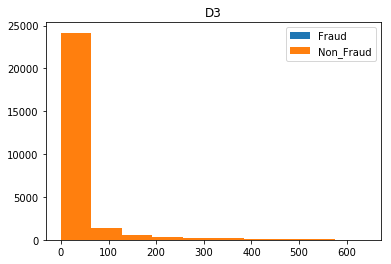

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


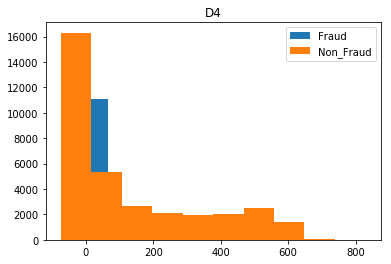

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


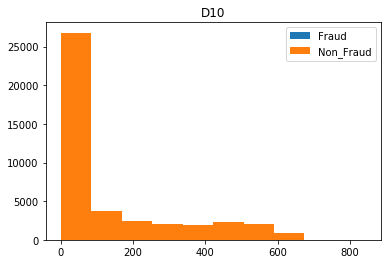

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


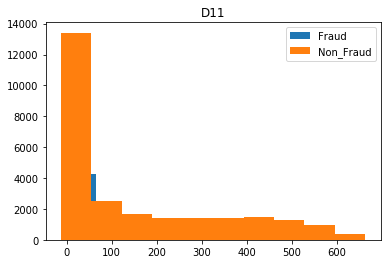

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


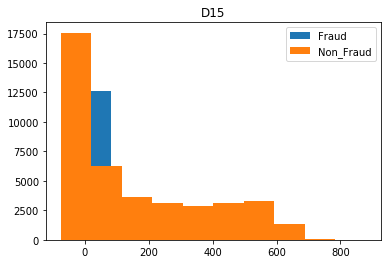

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


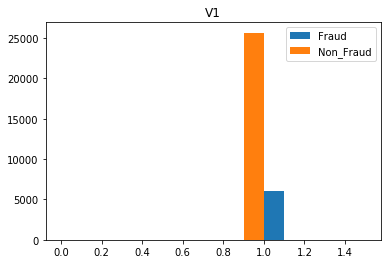

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


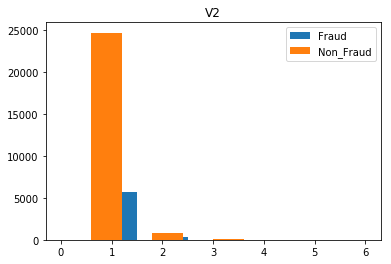

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


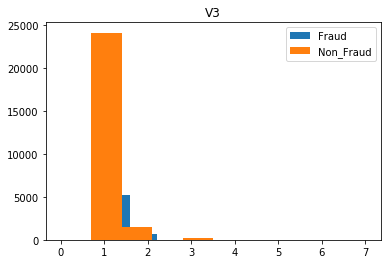

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


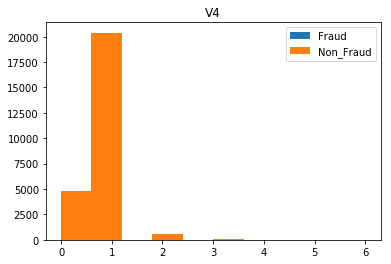

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


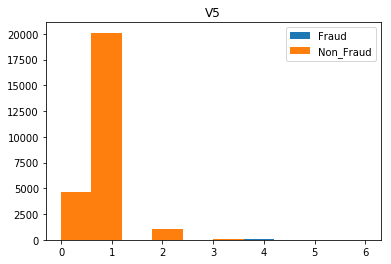

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


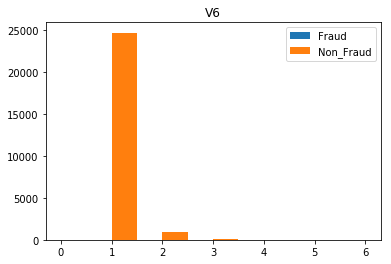

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


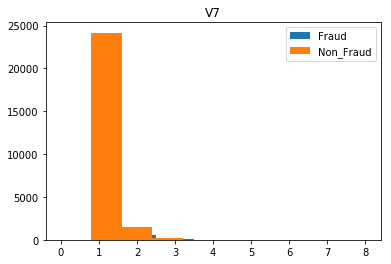

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


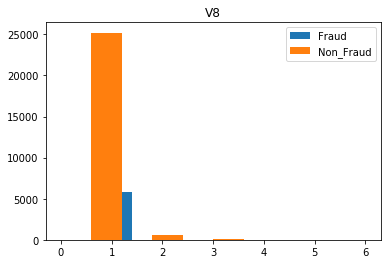

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


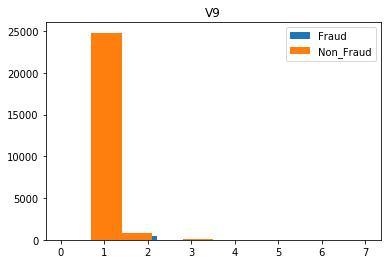

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


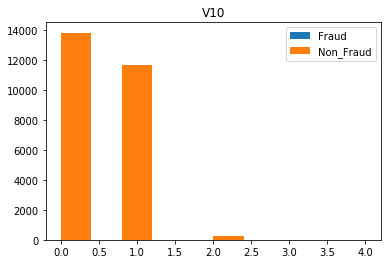

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


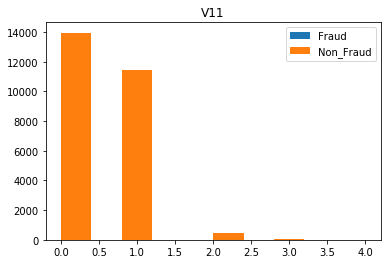

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


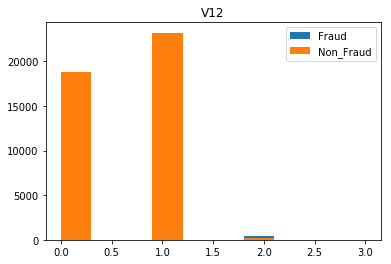

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


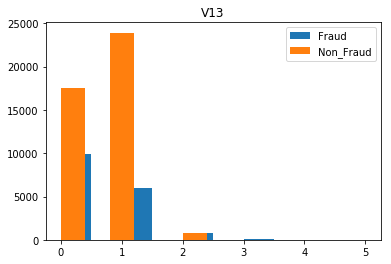

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


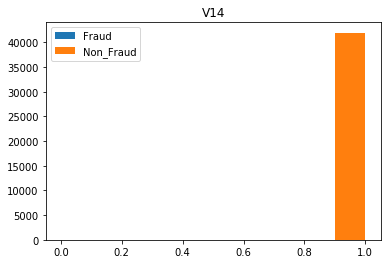

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


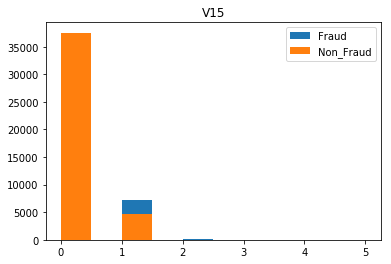

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


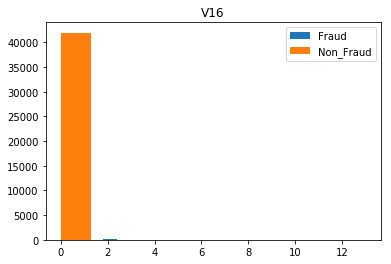

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


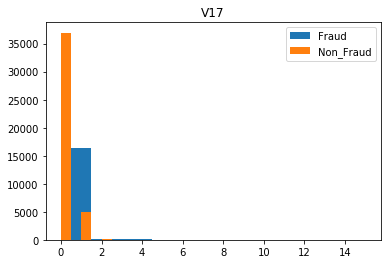

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


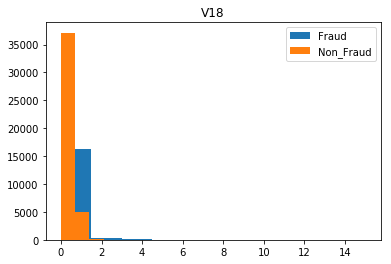

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


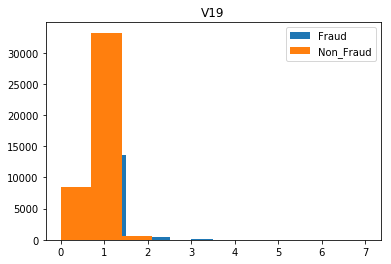

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


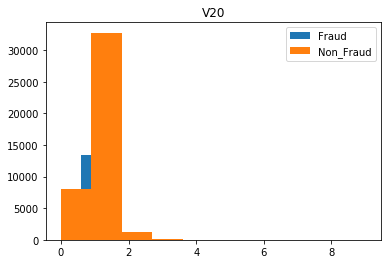

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


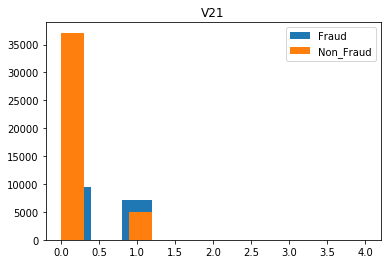

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


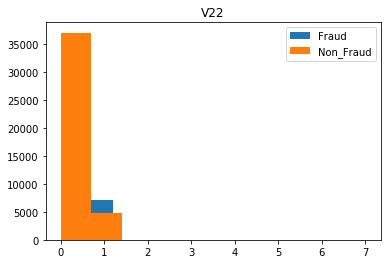

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


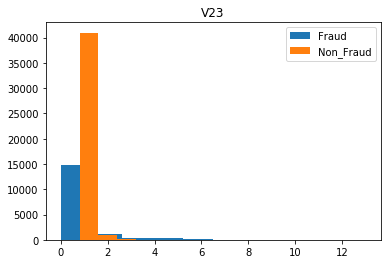

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


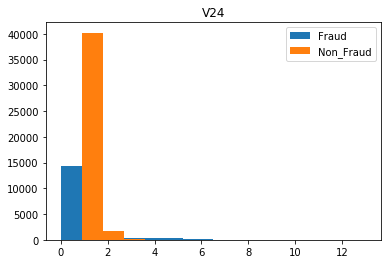

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


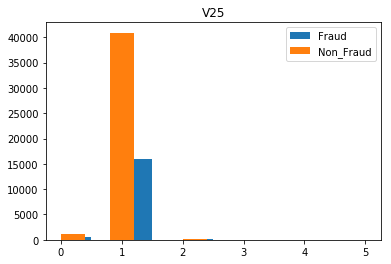

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


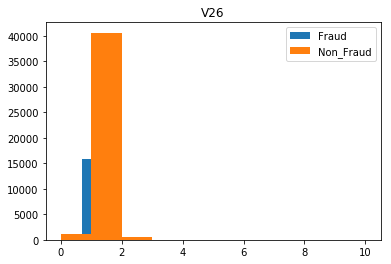

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


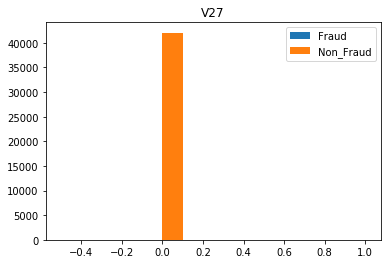

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


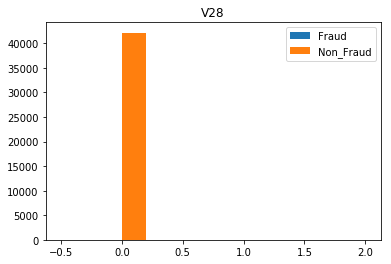

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


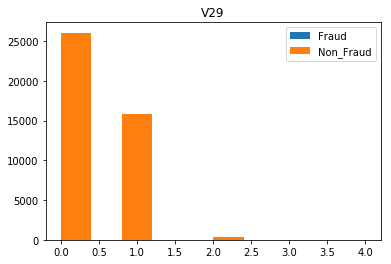

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


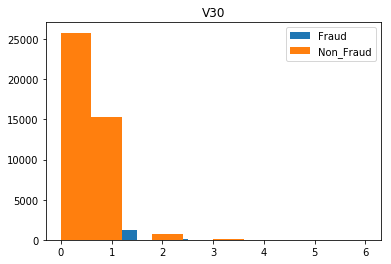

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


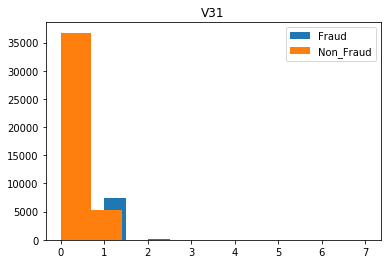

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


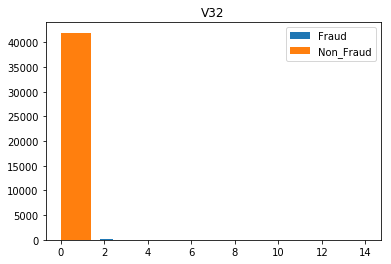

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


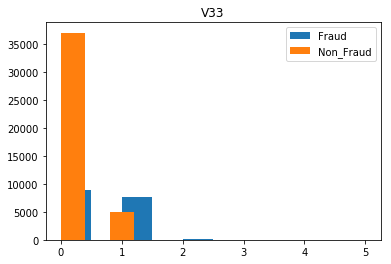

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


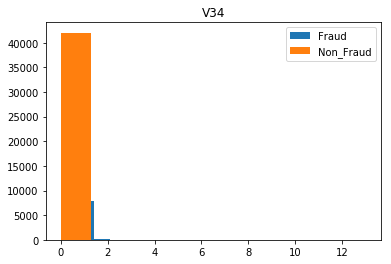

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


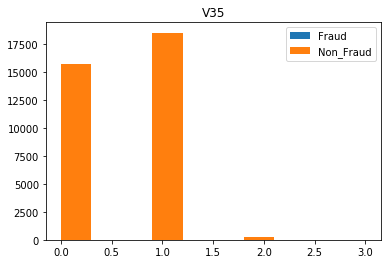

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


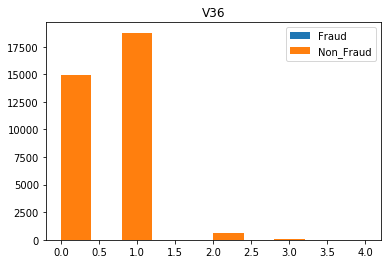

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


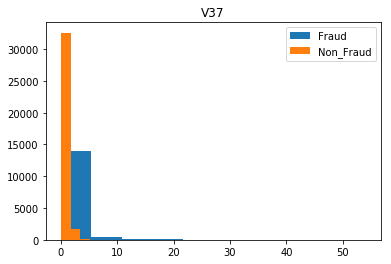

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


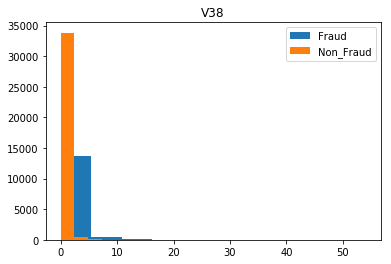

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


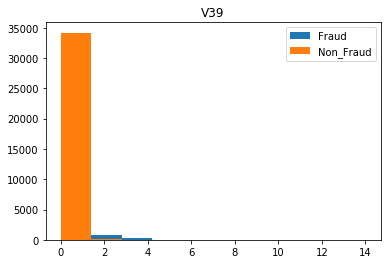

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


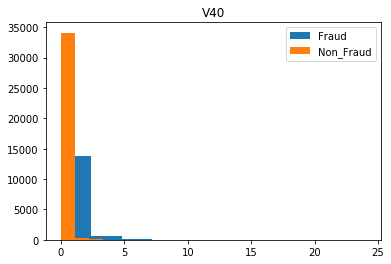

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


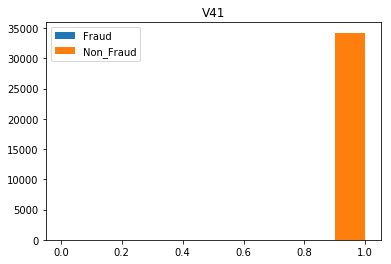

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


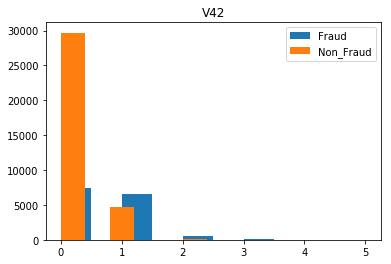

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


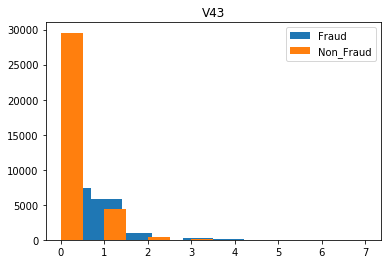

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


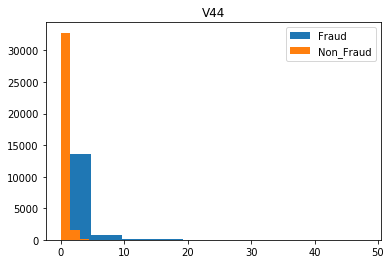

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


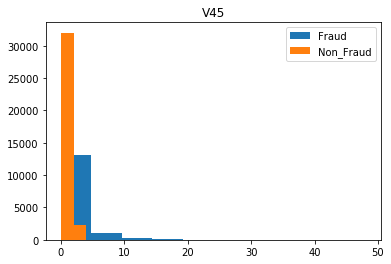

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


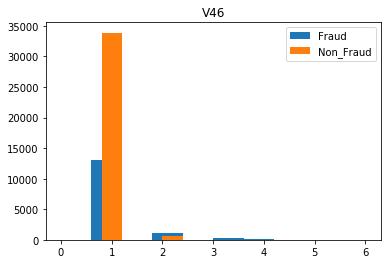

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


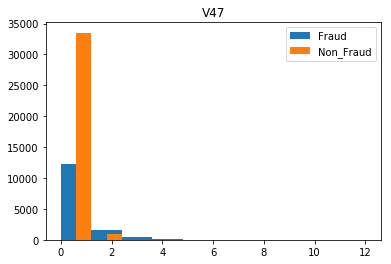

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


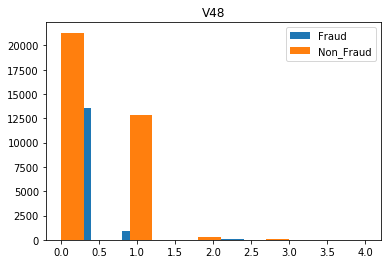

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


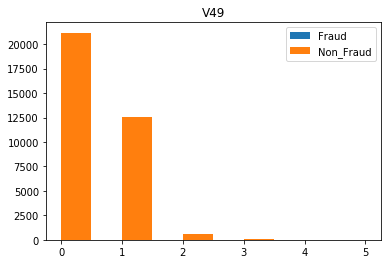

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


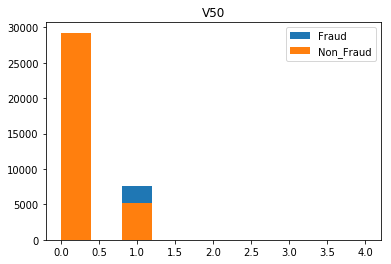

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


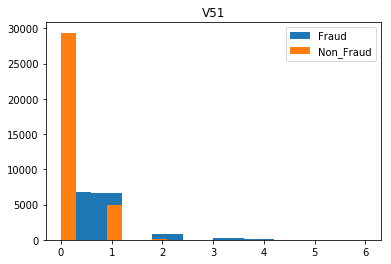

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


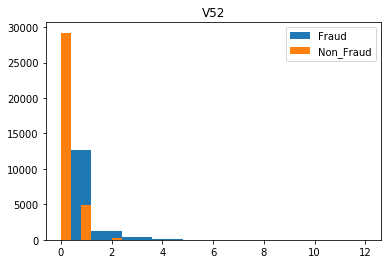

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


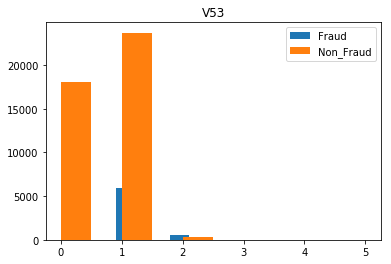

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


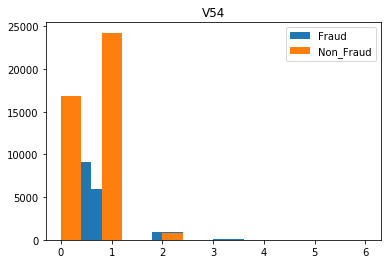

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


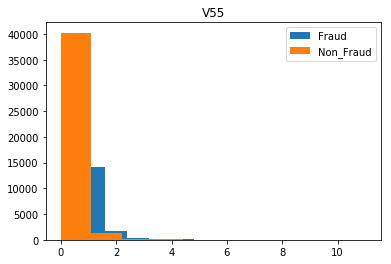

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


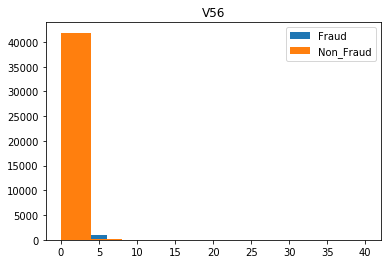

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


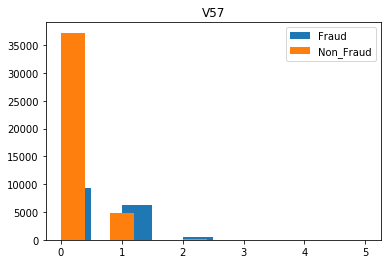

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


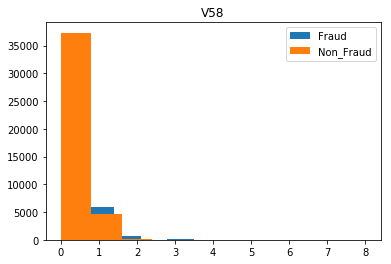

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


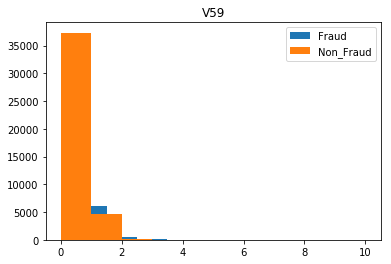

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


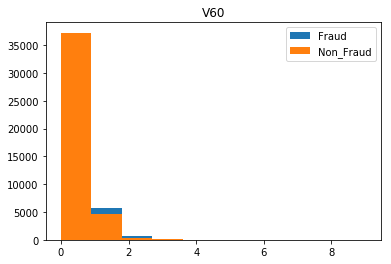

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


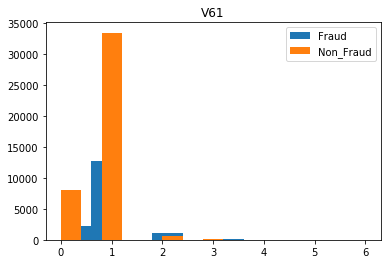

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


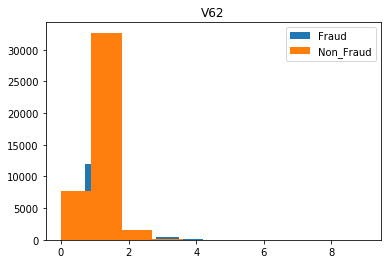

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


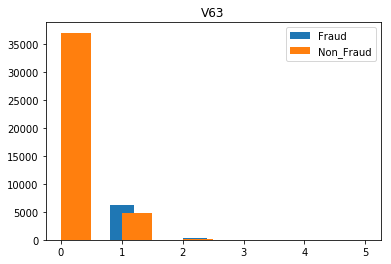

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


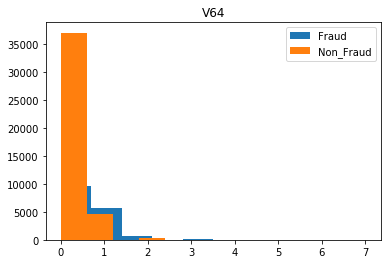

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


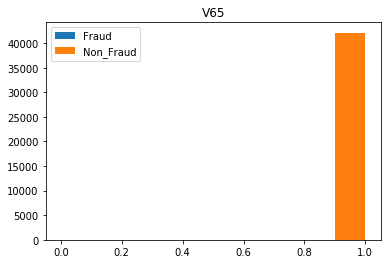

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


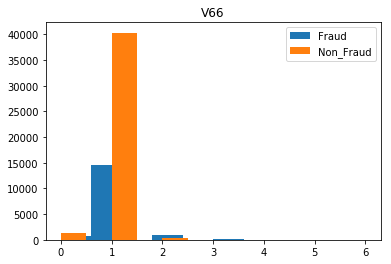

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


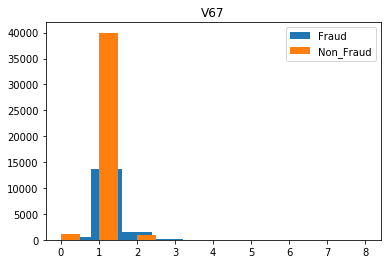

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


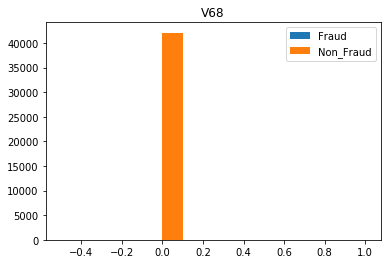

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


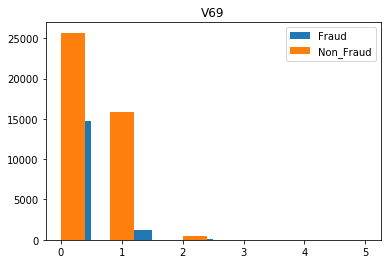

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


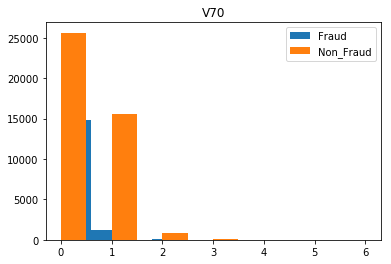

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


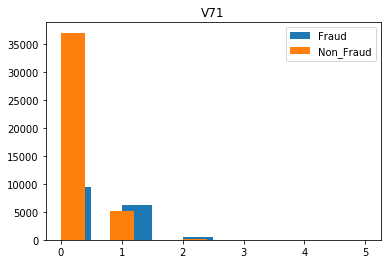

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


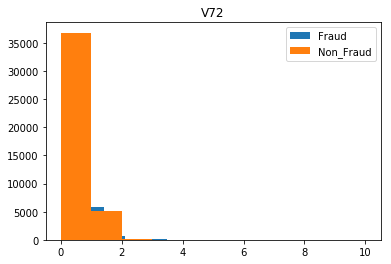

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


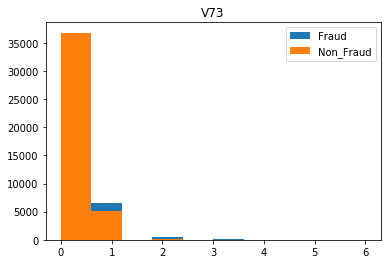

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


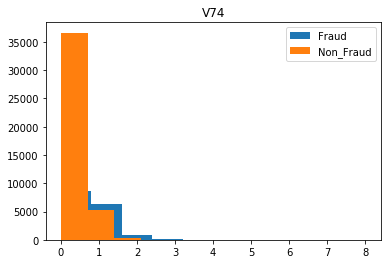

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


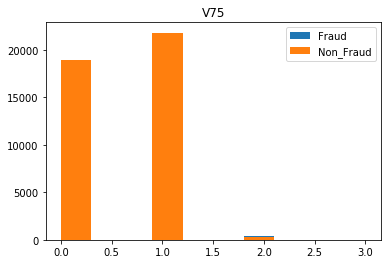

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


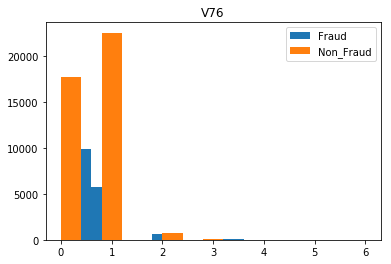

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


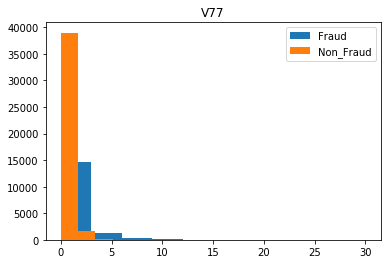

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


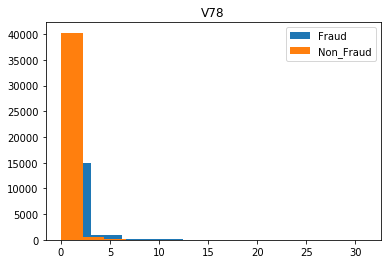

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


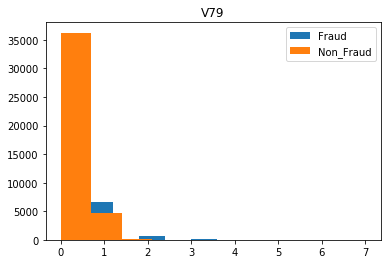

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


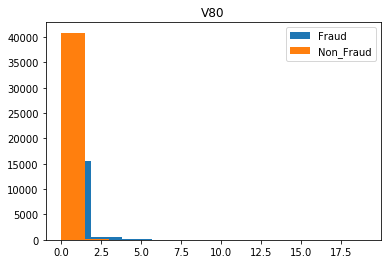

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


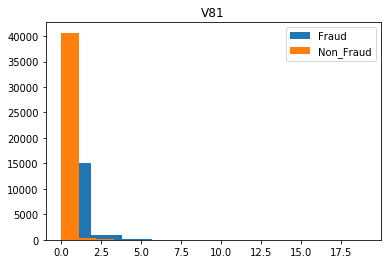

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


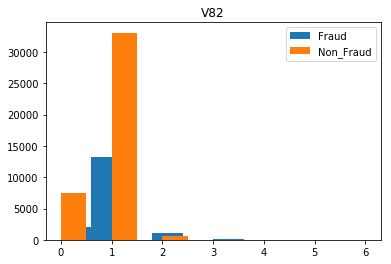

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


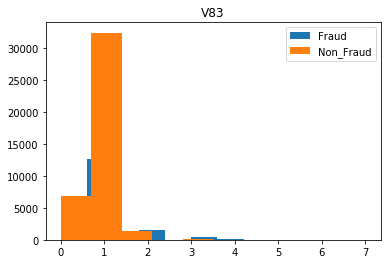

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


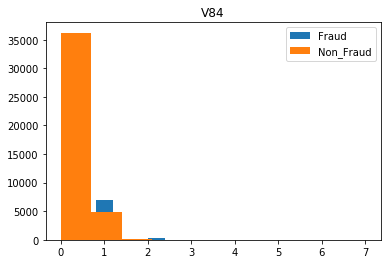

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


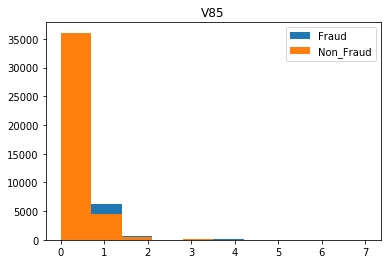

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


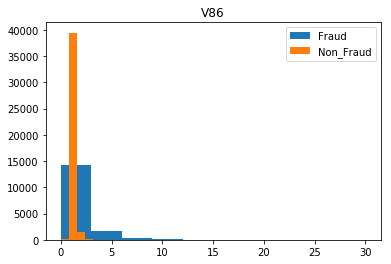

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


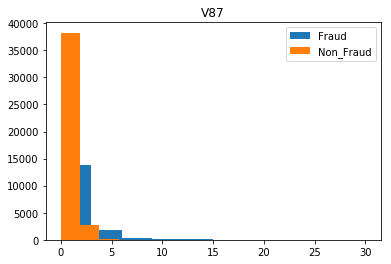

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


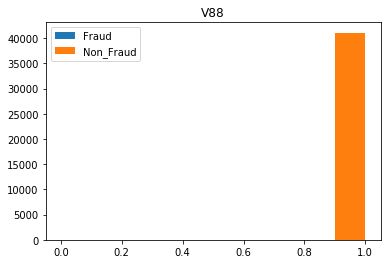

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


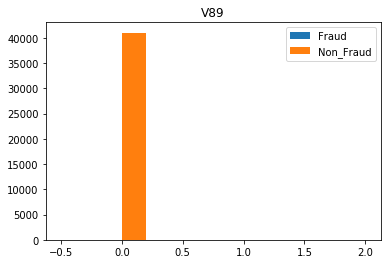

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


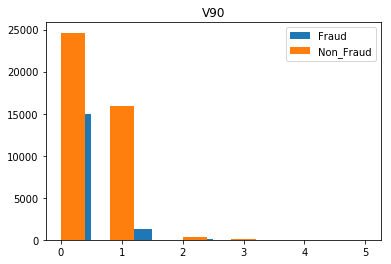

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


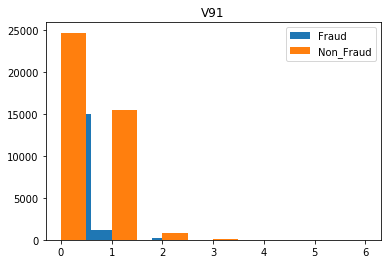

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


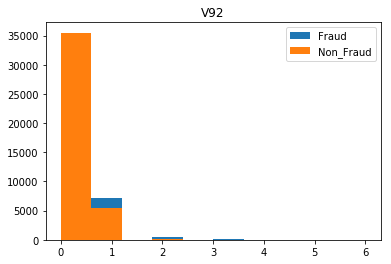

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


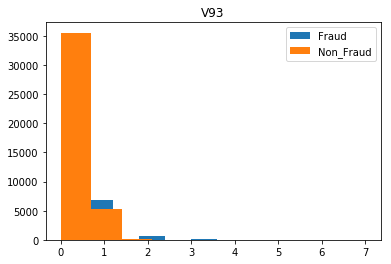

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


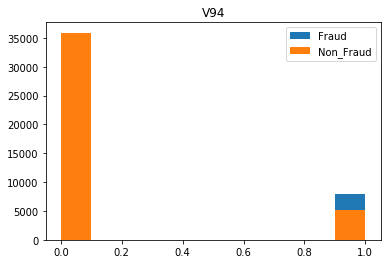

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


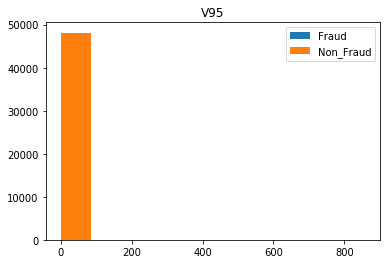

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


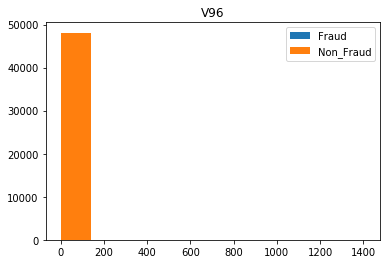

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


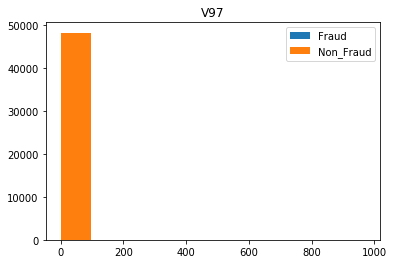

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


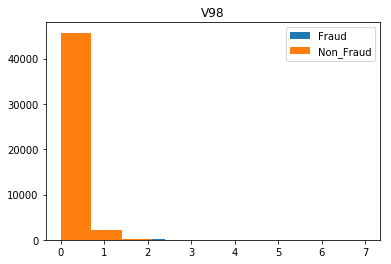

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


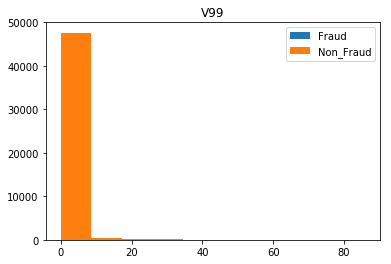

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


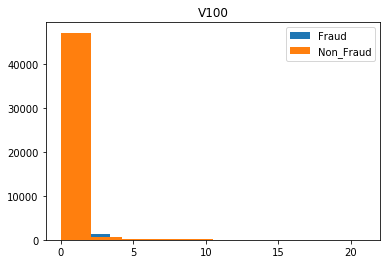

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


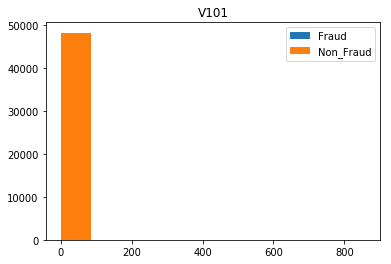

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


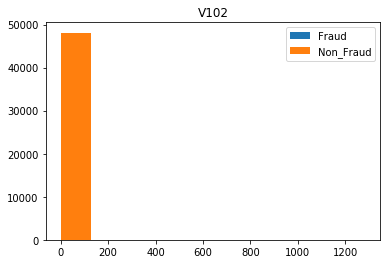

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


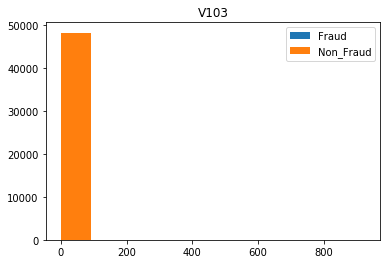

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


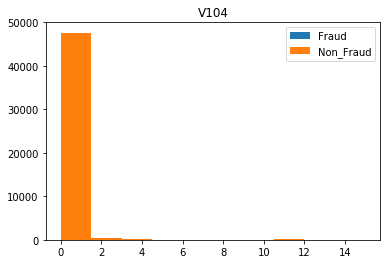

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


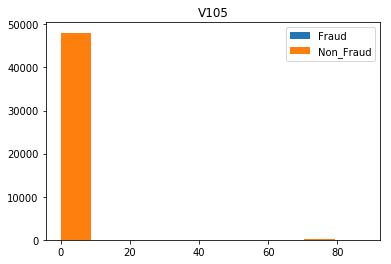

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


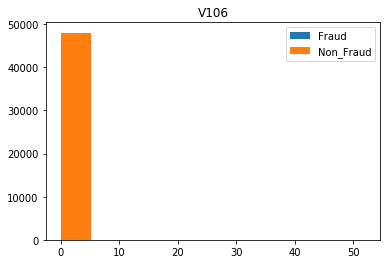

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


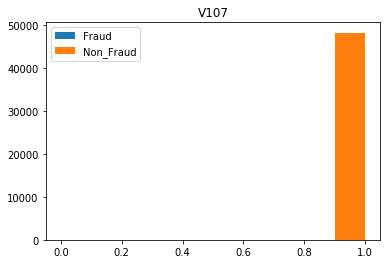

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


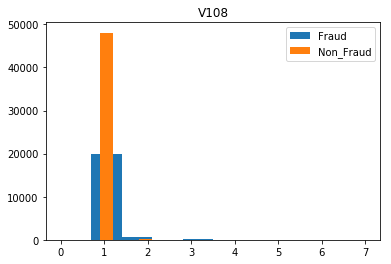

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


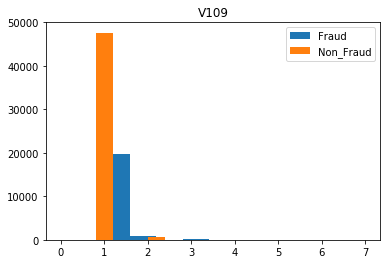

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


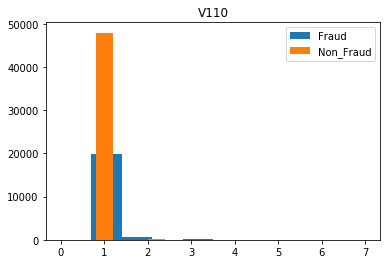

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


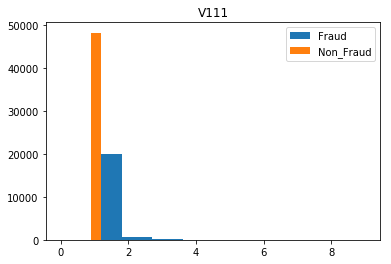

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


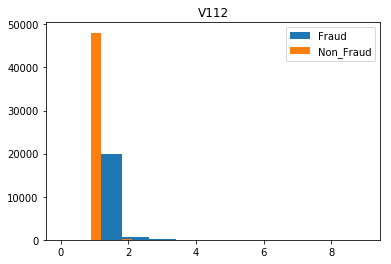

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


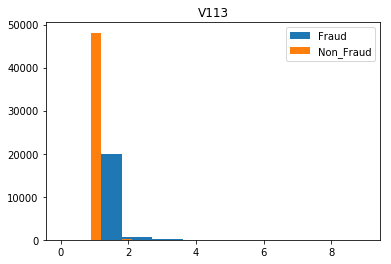

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


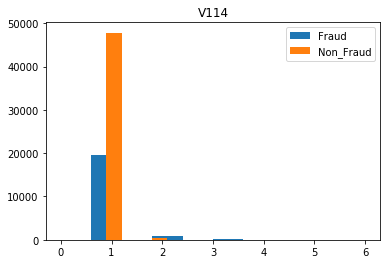

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


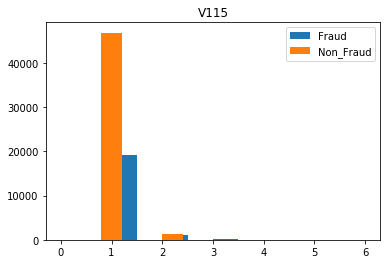

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


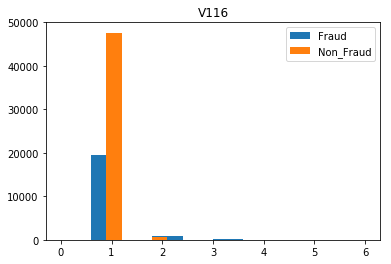

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


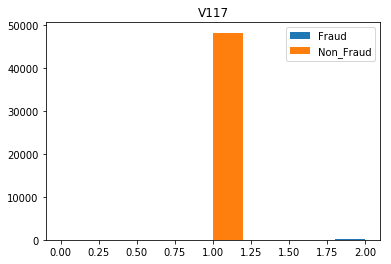

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


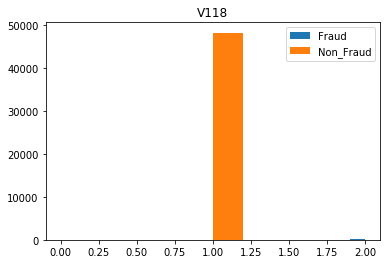

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


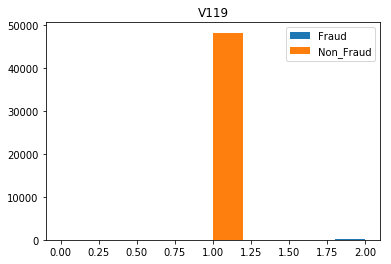

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


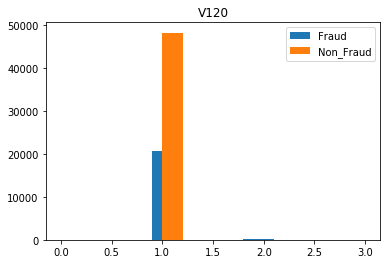

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


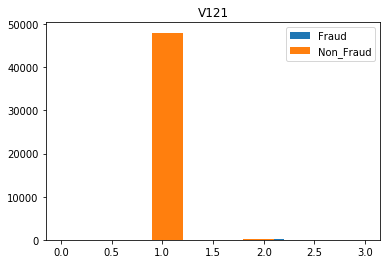

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


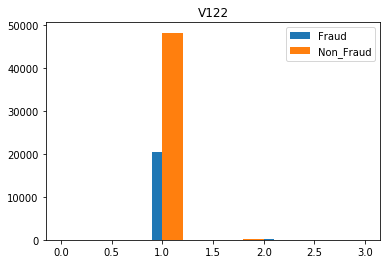

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


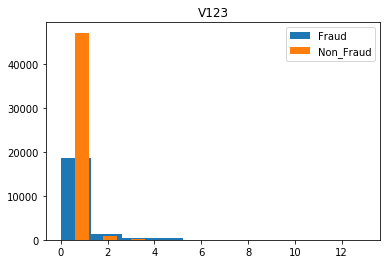

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


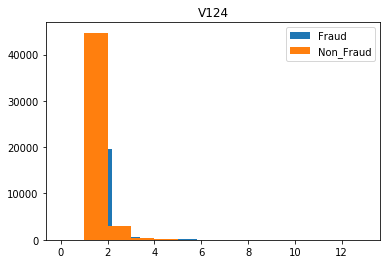

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


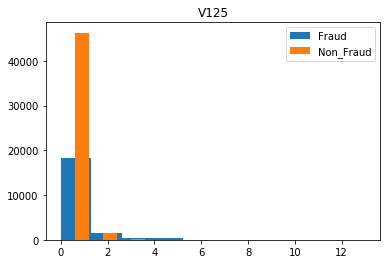

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


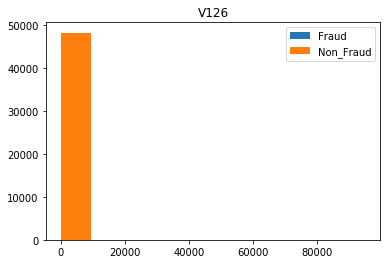

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


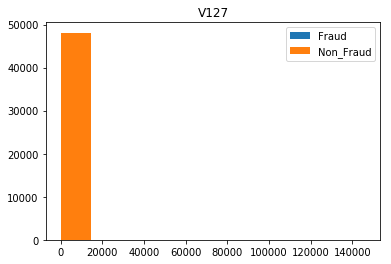

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


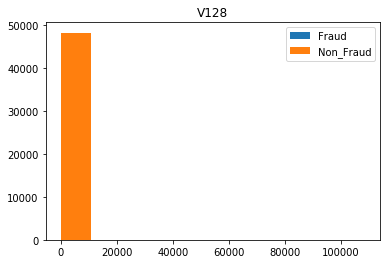

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


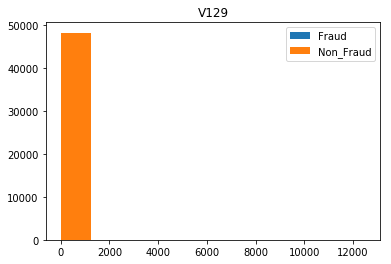

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


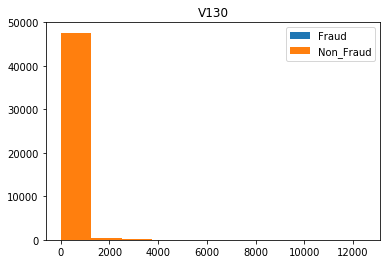

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


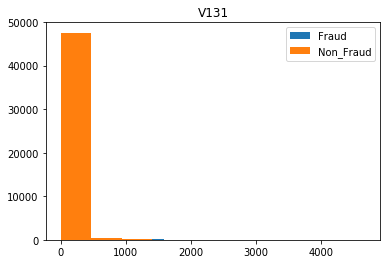

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


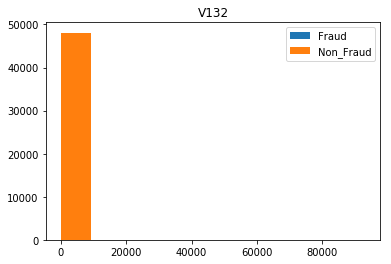

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


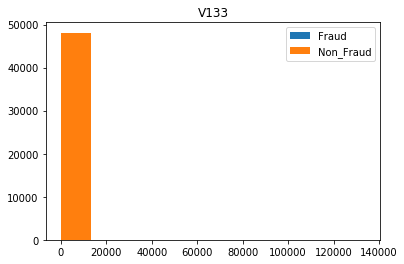

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


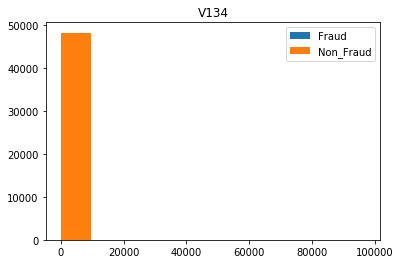

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


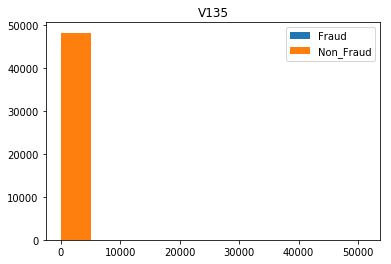

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


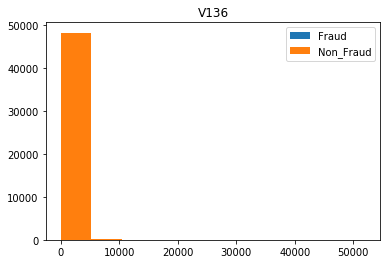

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


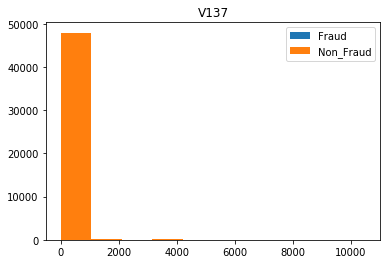

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


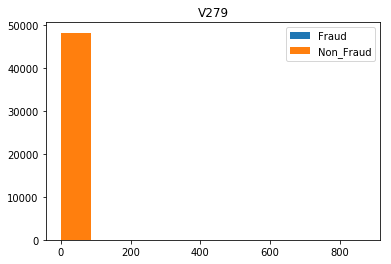

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


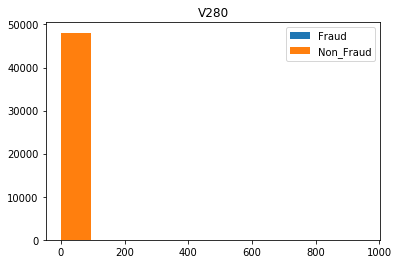

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


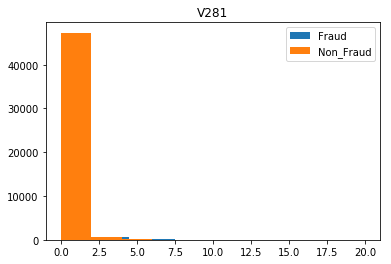

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


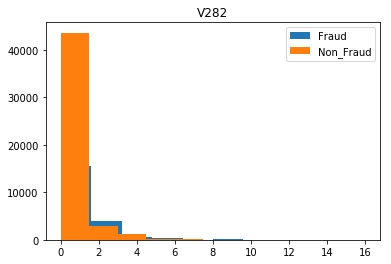

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


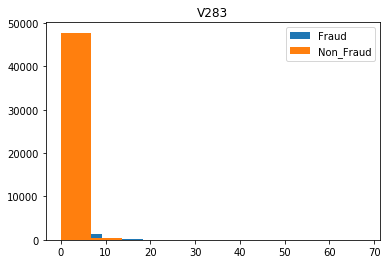

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


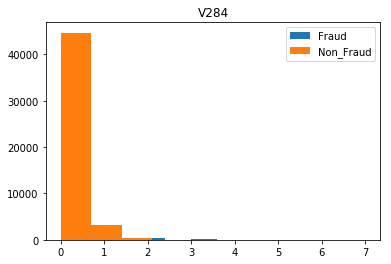

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


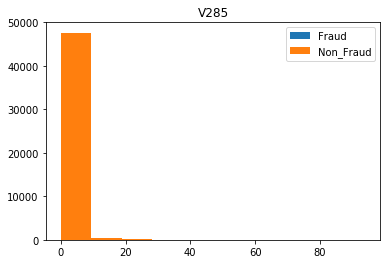

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


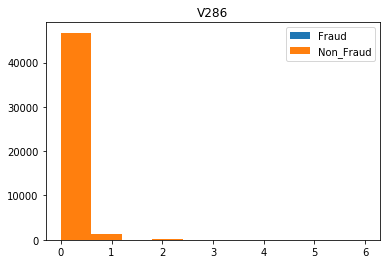

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


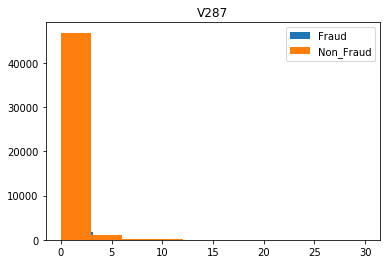

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


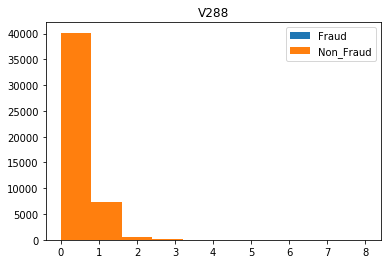

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


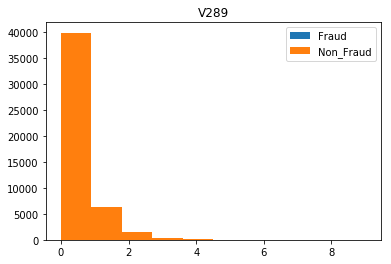

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


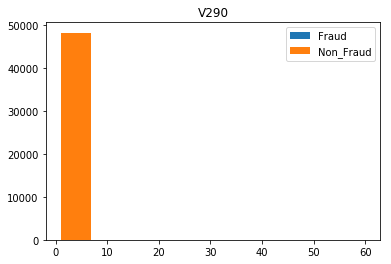

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


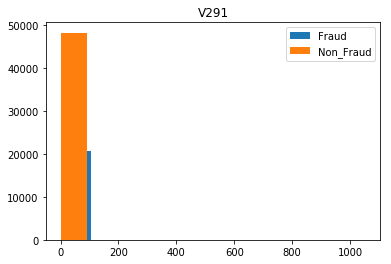

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


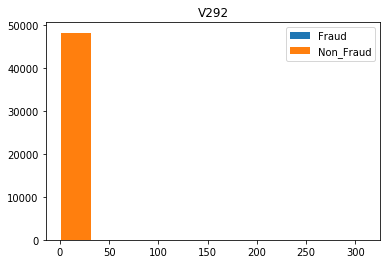

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


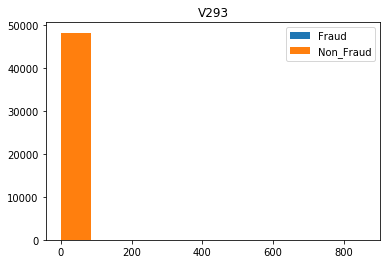

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


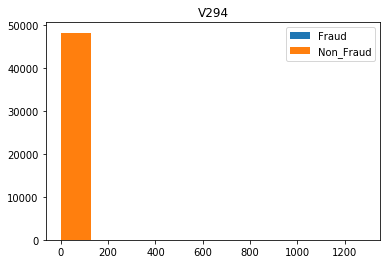

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


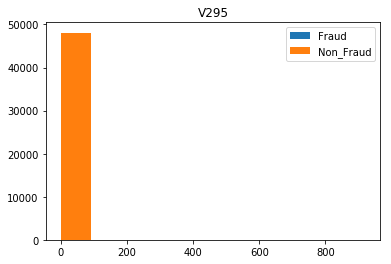

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


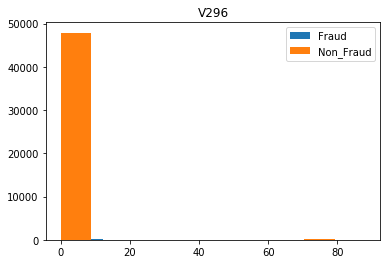

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


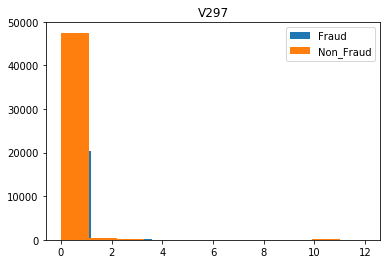

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


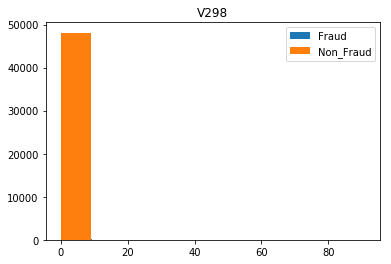

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


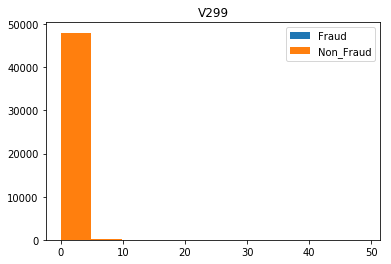

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


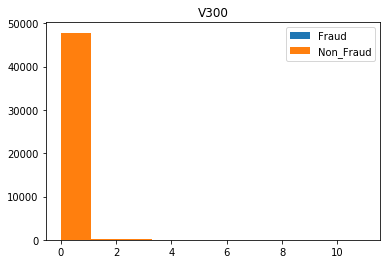

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


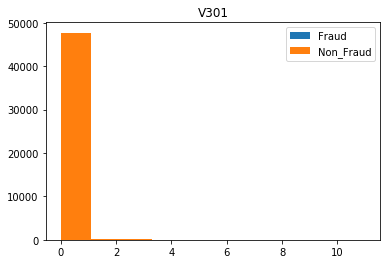

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


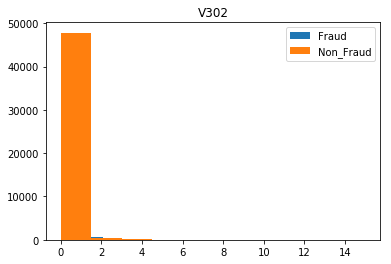

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


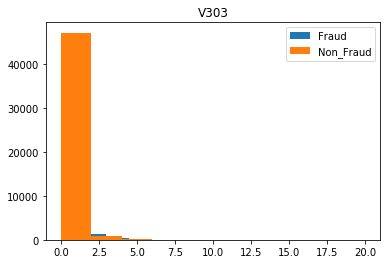

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


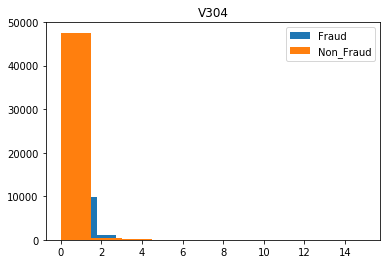

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


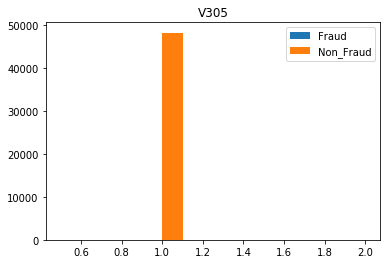

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


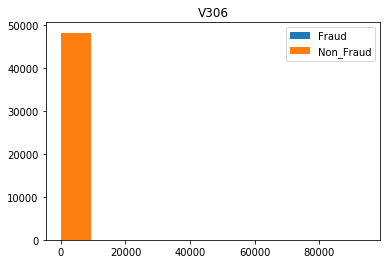

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


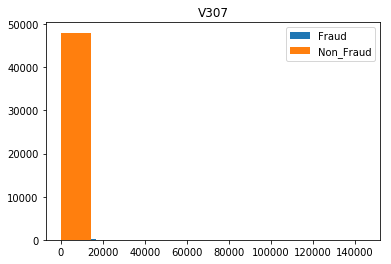

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


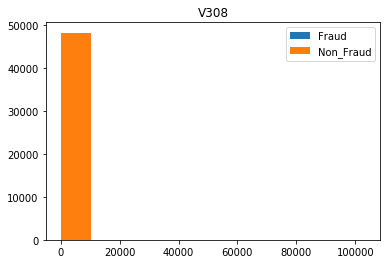

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


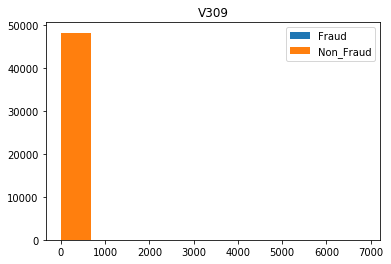

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


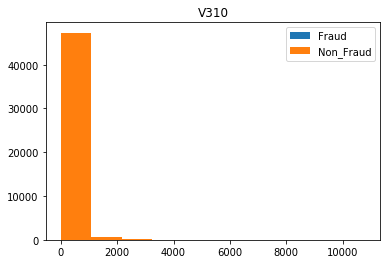

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


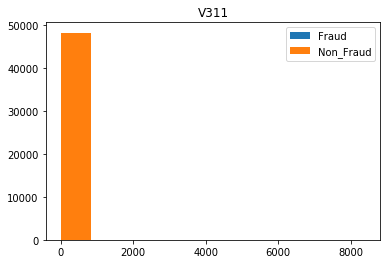

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


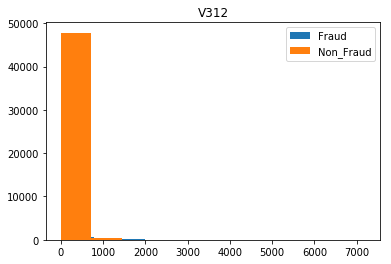

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


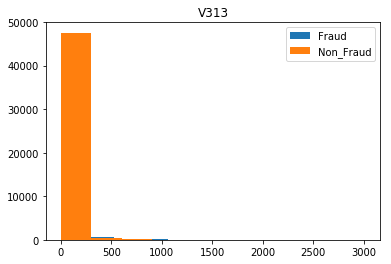

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


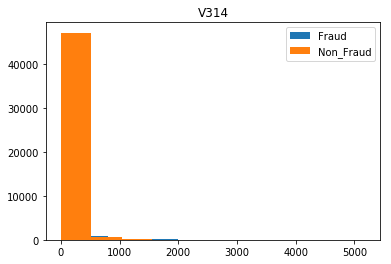

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


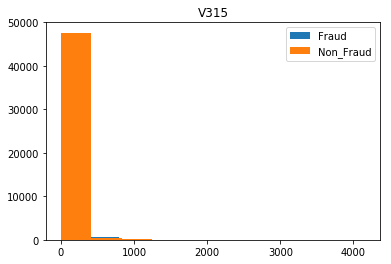

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


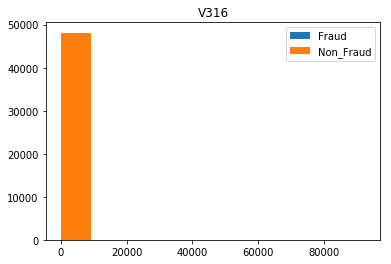

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


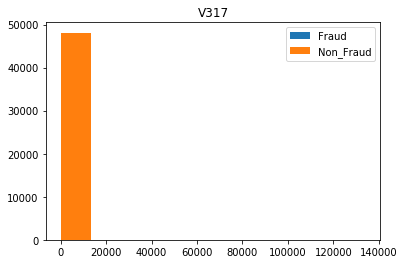

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


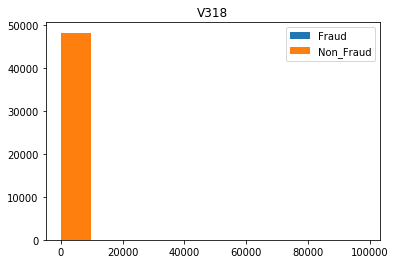

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


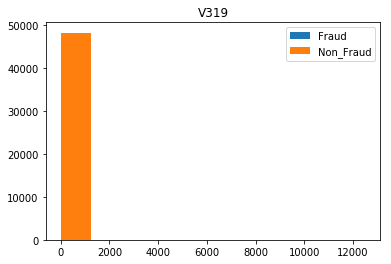

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


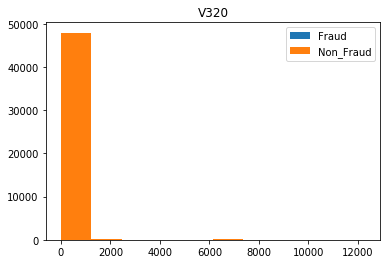

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


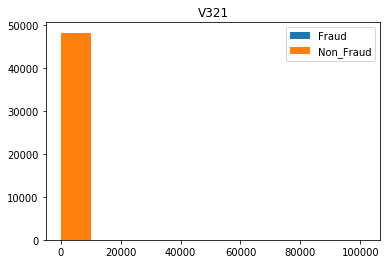

In [28]:
#First plot dist charts for all the numerical attribuates
for i in list(merge_df_new.select_dtypes(exclude='object')):

    plt.hist(merge_df_new[merge_df_new['isFraud']==1][i],label='Fraud')
    plt.hist(merge_df_new.sample(50000)[df_impute['isFraud']==0][i],label='Non_Fraud')
    plt.title(i)
    plt.legend()
    plt.show()

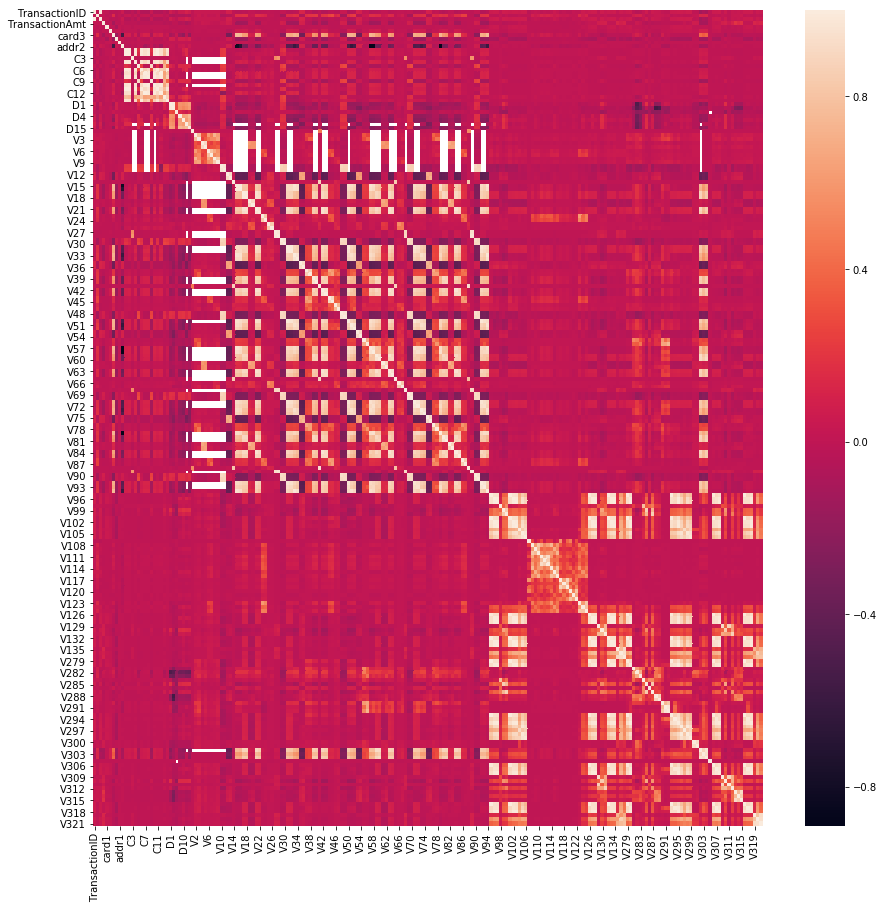

In [29]:
#plot heatmap
plt.figure(figsize=(15,15))
sns.heatmap(merge_df_new.corr())

As we can see from heatmap above, within C,D,V feature groups there are quite correlated with each other, therefore it is necessary to do feature selections in the next step

Also we found the scale of numerical features are not the same, since we will use PCA to select the useful features, thus we will need to do the normalization before doing PCA

#### Secondly categorical attributes

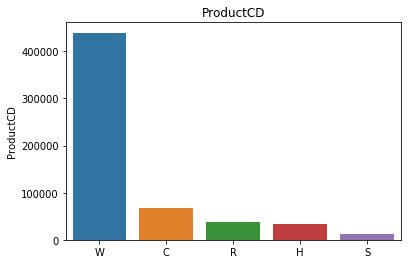

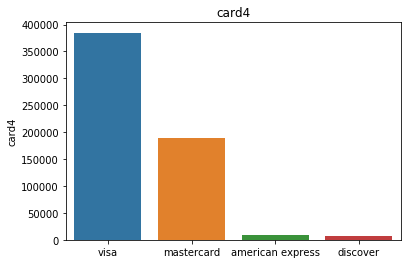

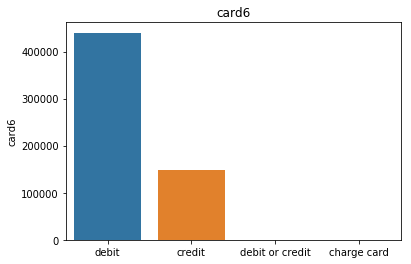

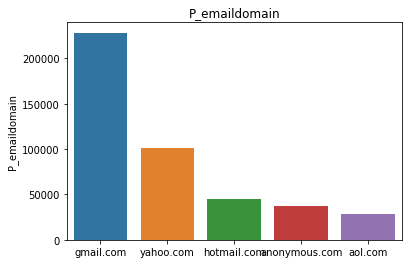

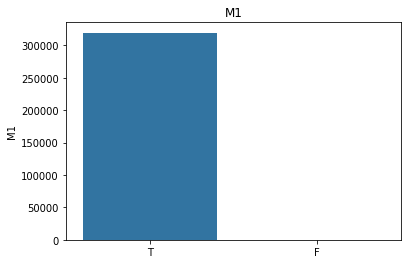

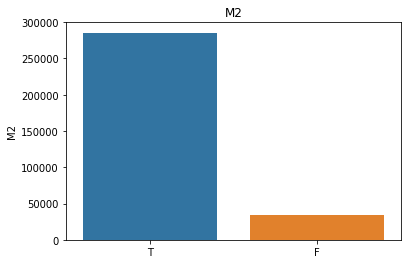

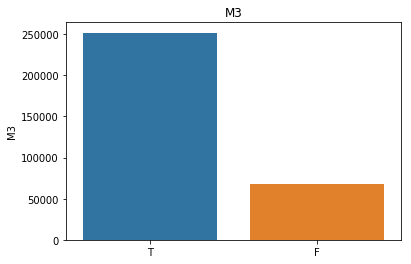

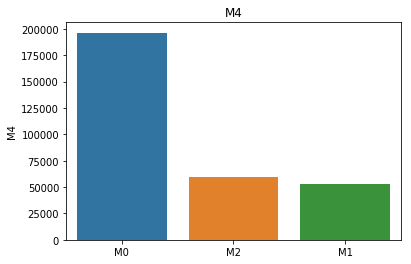

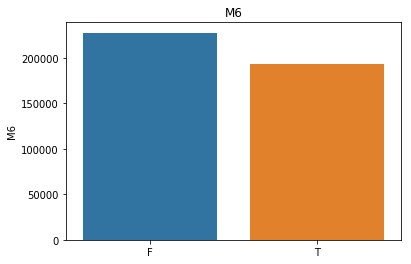

In [45]:
#First plot dist charts for all the numerical attribuates
for i in list(merge_df_new.select_dtypes(include='object')):

    sns.barplot(merge_df_new[i].value_counts().index[:5],merge_df_new[i].value_counts()[:5])
    plt.title(i)
    plt.show()

In [60]:
for i in list(merge_df_new.select_dtypes(include='object')):
    print(i)
    print('\n')
    print(pd.pivot_table(merge_df_new,index=[i],values=['isFraud'],aggfunc=np.mean).sort_values(by='isFraud',ascending=False))

ProductCD


            isFraud
ProductCD          
C          0.116873
S          0.058996
H          0.047662
R          0.037826
W          0.020399
card4


                   isFraud
card4                     
discover          0.077282
visa              0.034756
mastercard        0.034331
american express  0.028698
card6


                  isFraud
card6                    
credit           0.066785
debit            0.024263
charge card      0.000000
debit or credit  0.000000
P_emaildomain


                   isFraud
P_emaildomain             
protonmail.com    0.407895
mail.com          0.189624
outlook.es        0.130137
aim.com           0.126984
outlook.com       0.094584
hotmail.es        0.065574
live.com.mx       0.054740
hotmail.com       0.052950
gmail.com         0.043542
yahoo.fr          0.034965
embarqmail.com    0.034615
mac.com           0.032110
icloud.com        0.031434
comcast.net       0.031187
charter.net       0.030637
frontier.com      0.028571
bellsouth.ne

### Feature Selection 

We try 2 feature selection method to reduce number of features
* Using Random Forest to select the most important features 
* Using PCA
For both will keep the top features which maintain 80% of variance

### Random forest feature selection

In [210]:
X=df_impute.drop(['isFraud','TransactionID'],axis=1)
y=df_impute['isFraud']

In [217]:
#further split X_train,y_train into train and validation set for model selection
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=0.1,random_state=0)

In [218]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((531486, 219), (59054, 219), (531486,), (59054,))

In [229]:
#onehot encoding
X_dummies_train=pd.get_dummies(X_train[onehot_list],prefix=onehot_list,drop_first=True)
X_dummies_val=pd.get_dummies(X_val[onehot_list],prefix=onehot_list,drop_first=True)

In [230]:
X_train_new=pd.concat([X_train,X_dummies_train],axis=1).drop(onehot_list,axis=1)
X_val_new=pd.concat([X_val,X_dummies_val],axis=1).drop(onehot_list,axis=1)

In [231]:
X_train.shape,X_train_new.shape,X_val.shape,X_val_new.shape

((531486, 219), (531486, 230), (59054, 219), (59054, 230))

In [232]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train_new, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [233]:
selected_feat= X_train_new.columns[(sel.get_support())]
selected_feat

Index(['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5',
       'addr1', 'C1', 'C2', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12',
       'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D10', 'D11', 'D15', 'V44', 'V45',
       'V86', 'V87', 'V127', 'V128', 'V130', 'V133', 'V282', 'V283', 'V285',
       'V294', 'V306', 'V307', 'V308', 'V310', 'V312', 'V313', 'V314', 'V315',
       'V317', 'V318', 'P_emaildomain_total', 'P_emaildomain_fraud_rate',
       'card4_mastercard', 'card4_visa', 'card6_credit', 'card6_debit'],
      dtype='object')

In [234]:
len(selected_feat)

54

In [235]:
sel.threshold_

0.004347826086956522

In [236]:
sel.estimator_.feature_importances_[sel.get_support()].sum()

0.72018697718274

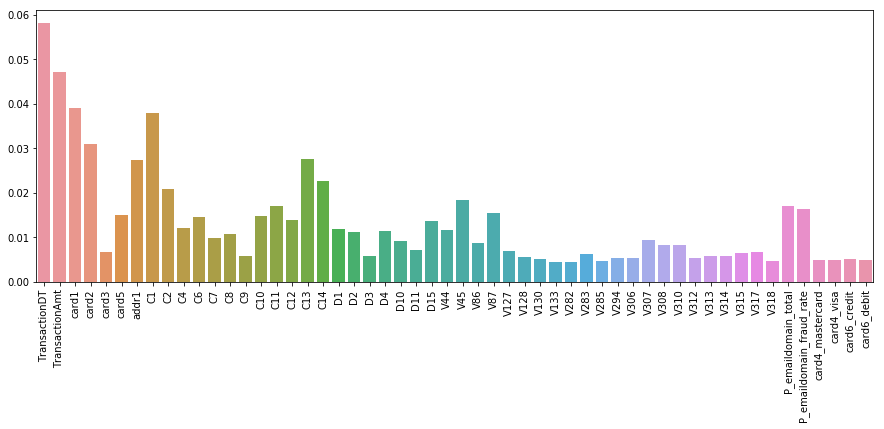

In [237]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(selected_feat,sel.estimator_.feature_importances_[sel.get_support()])

In [240]:
#Create the new dataframe using selected attribute
X_train_rf=X_train_new.loc[:,sel.get_support()]
X_val_rf=X_val_new.loc[:,sel.get_support()]

In [241]:
X_train_rf.shape,X_val_rf.shape

((531486, 54), (59054, 54))

In [205]:
X_train_rf.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,C1,C2,C4,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,V44,V45,V86,V87,V127,V128,V130,V282,V283,V285,V294,V306,V307,V308,V310,V312,V313,V314,V315,V317,V318,P_emaildomain_total,P_emaildomain_fraud_rate,card4_mastercard,card4_visa,card6_credit,card6_debit
0,86400,68.5,13926,361.0,150.0,142.0,315.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,97.0,13.0,26.0,13.0,13.0,0.0,1.0,1.0,1.0,1.0,117.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,100934.0,0.043542,0,0,1,0
1,86401,29.0,2755,404.0,150.0,102.0,325.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,0.0,0.0,43.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228355.0,0.043542,1,0,1,0
2,86469,59.0,4663,490.0,150.0,166.0,330.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,0.0,0.0,315.0,315.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5096.0,0.094584,0,1,0,1
3,86499,50.0,18132,567.0,150.0,117.0,476.0,2.0,5.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,84.0,43.0,111.0,1.0,1.0,1.0,1.0,1758.0,925.0,354.0,0.0,0.0,10.0,38.0,50.0,1758.0,925.0,354.0,135.0,0.0,0.0,0.0,1404.0,790.0,100934.0,0.022757,1,0,0,1
4,86506,50.0,4497,514.0,150.0,102.0,420.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,26.0,15.0,43.0,52.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228355.0,0.043542,1,0,1,0


In [72]:
# from sklearn.preprocessing import OneHotEncoder
# #do one_hot encoder before impute numerical features
# enc = OneHotEncoder()
# cat_impute=enc.fit_transform(df_impute.select_dtypes(include='object'))

### PCA
Normalization first using StandardScaler

In [175]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
X_train_pca=standardscaler.fit_transform(X_train_new)

array([[-1.57798669, -0.27816747,  0.82169536, ..., -0.31343551,
         2.97733581, -0.95422174],
       [-1.57798648, -0.44332726, -1.45755819, ..., -0.31343551,
        -0.33587075, -0.95422174],
       [-1.57797175, -0.31788944, -1.06826307, ..., -0.31343551,
        -0.33587075, -0.95422174],
       ...,
       [ 1.82767297, -0.4351738 ,  0.43627687, ..., -0.31343551,
        -0.33587075,  1.04797445],
       [ 1.82767491, -0.07537632, -0.42290644, ..., -0.31343551,
        -0.33587075, -0.95422174],
       [ 1.82768423,  0.6059601 ,  1.05429307, ..., -0.31343551,
        -0.33587075,  1.04797445]])

X_train_pca.shape

In [196]:
#Normalize the attributes before putting into PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=0.90)
X_reduced=pca.fit_transform(X_train_pca)

In [197]:
X_reduced.shape

(590540, 65)

As we can see the comparison between model selection using RF and PCA
* Using RF to select 53 important features with variance of 71%
* Using PCA to get 65 PC with 90% of variance
PCA performance here much better than that of RF model selection, however also remember the limitation of PCA, Independent variables become less interpretable after PCA. 

Therefore we will use both the output of RF selection and PCA for model selection.

### Model Selection
LogisticRegression, Stochastic GD, Random Forest, Gradient Boosting

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import average_precision_score,roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

In [208]:
lg=LogisticRegression(penalty='l2', C=1.0)
#sgd=SGDClassifier()
RF=RandomForestClassifier(n_estimators=100,max_depth=5, random_state=0)
gb=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=5, random_state=0)

In [248]:
import time
#Using SMOT
fpr_dic={}
tpr_dic={}
precision_dic={}
recall_dic={}
for ml,name in zip([lg,RF,gb],['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier']):

    start_time = time.time()
    ml.fit(X_train_rf,y_train)
    training_time=np.round(time.time()-start_time,0)
    y_pred_train=ml.predict(X_train_rf)
    y_pred_val=ml.predict(X_val_rf)
    y_pred_train_proba=ml.predict_proba(X_train_rf)
    y_pred_train_proba = y_pred_train_proba[:, 1]
    y_pred_val_proba=ml.predict_proba(X_val_rf)
    y_pred_val_proba = y_pred_val_proba[:, 1]
    average_precision_train = average_precision_score(y_train, y_pred_train_proba)
    average_precision_val = average_precision_score(y_val, y_pred_val_proba)
    roc = roc_auc_score(y_val, y_pred_val_proba)
    fpr,tpr,_=roc_curve(y_val, y_pred_val_proba)
    precision,recall,_=precision_recall_curve(y_val, y_pred_val_proba)
    
    fpr_dic[name]=fpr
    tpr_dic[name]=tpr
    precision_dic[name]=precision
    recall_dic[name]=recall

    print('{} : Train AUPRC {:.2%} ; Valid AUPRC {:.2%}; ROC {:.2%} ; training time {} seconds'.format(name,average_precision_train,average_precision_val,roc,training_time))

/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression : Train AUPRC 4.99% ; Valid AUPRC 5.32%; ROC 62.72% ; training time 8.0 seconds
RandomForestClassifier : Train AUPRC 42.89% ; Valid AUPRC 42.17%; ROC 84.54% ; training time 49.0 seconds
GradientBoostingClassifier : Train AUPRC 32.20% ; Valid AUPRC 28.87%; ROC 83.01% ; training time 334.0 seconds


In [249]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42,sampling_strategy=0.1)

In [251]:
X_train_rf_sm,y_train_sm=sm.fit_sample(X_train_rf,y_train)
print(np.bincount(y_train),np.bincount(y_train_sm))

[512828  18658] [512828  51282]


In [253]:
lg_sm=LogisticRegression(penalty='l2', C=1.0)
#sgd=SGDClassifier()
RF_sm=RandomForestClassifier(n_estimators=100,max_depth=5, random_state=0)
gb_sm=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=5, random_state=0)

In [258]:
X_train_rf_sm.shape,y_train_sm.shape

((564110, 54), (564110,))

In [259]:
import time
#Using SMOT
fpr_dic={}
tpr_dic={}
precision_dic={}
recall_dic={}
for ml,name in zip([lg_sm,RF_sm,gb_sm],['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier']):

    start_time = time.time()
    ml.fit(X_train_rf_sm,y_train_sm)
    training_time=np.round(time.time()-start_time,0)
    y_pred_train=ml.predict(X_train_rf_sm)
    y_pred_val=ml.predict(X_val_rf)
    y_pred_train_proba=ml.predict_proba(X_train_rf_sm)
    y_pred_train_proba = y_pred_train_proba[:, 1]
    y_pred_val_proba=ml.predict_proba(X_val_rf)
    y_pred_val_proba = y_pred_val_proba[:, 1]
    average_precision_train = average_precision_score(y_train_sm, y_pred_train_proba)
    average_precision_val = average_precision_score(y_val, y_pred_val_proba)
    roc = roc_auc_score(y_val, y_pred_val_proba)
    fpr,tpr,_=roc_curve(y_val, y_pred_val_proba)
    precision,recall,_=precision_recall_curve(y_val, y_pred_val_proba)
    
    fpr_dic[name]=fpr
    tpr_dic[name]=tpr
    precision_dic[name]=precision
    recall_dic[name]=recall

    print('{} : Train AUPRC {:.2%} ; Valid AUPRC {:.2%}; ROC {:.2%} ; training time {} seconds'.format(name,average_precision_train,average_precision_val,roc,training_time))

/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression : Train AUPRC 11.53% ; Valid AUPRC 5.18%; ROC 61.04% ; training time 8.0 seconds
RandomForestClassifier : Train AUPRC 75.53% ; Valid AUPRC 39.42%; ROC 83.83% ; training time 57.0 seconds
GradientBoostingClassifier : Train AUPRC 91.90% ; Valid AUPRC 55.29%; ROC 89.08% ; training time 397.0 seconds


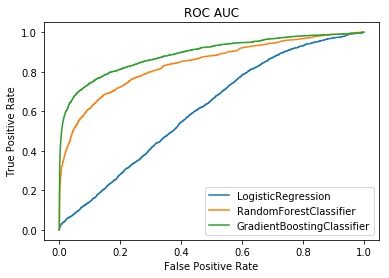

In [262]:
#plot ROC of 3 models
for i in ['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier']:
    plt.plot(fpr_dic[i],tpr_dic[i],label=i)
    plt.title('ROC AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

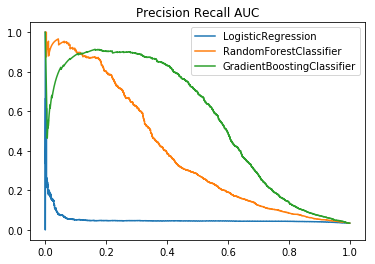

In [263]:
#plot PRC of 3 models
for i in ['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier']:
    plt.plot(recall_dic[i],precision_dic[i],label=i)
    plt.title('Precision Recall AUC')
    plt.legend()

### Model pipeline and hyperparameter tuning

In [261]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

Pipeline needs below steps:
* Handling missing data
* Feature Selection/PCA
* SMOT or not ( upsampling )

### Custom Transformer

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin #TransformerMixin added fit_transform()
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

#imputation by various datatypes
class Imputation_by_dtypes(BaseEstimator,TransformerMixin):
    def __init__ (self,binary_list=False,onehot_list=False,target_list=False):
        self.binary_list=binary_list
        self.onehot_list=onehot_list
        self.target_list=target_list
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        for i in target_list:
            encoding=X.groupby(i).agg({'TransactionID':['count'],'isFraud':[np.sum]}).reset_index()
            encoding.columns=[i,i+'_'+'total',i+'_'+'fraud']
            encoding[i+'_'+'fraud_rate']=encoding[i+'_'+'fraud']/encoding[i+'_'+'total']
            #impute 2 new target encoding columns using median
            encoding[i+'_'+'total'].fillna(encoding[i+'_'+'total'].median(),inplace=True)
            encoding[i+'_'+'fraud_rate'].fillna(encoding[i+'_'+'fraud_rate'].median(),inplace=True)
            X=X.merge(encoding,on=i,how='left')
            X.drop([i,i+'_'+'fraud'],axis=1,inplace=True)
    
    #for one hot encoder list
        for i in onehot_list:
            X[i].fillna('unknown',inplace=True)
        
   #for binary list
       for i in binary_list:
            X[i].fillna(X[i].mode()[0],inplace=True)
            X[i]= X[i].replace({'T':1,'F':0})
    
    #for numerical list
       for i in list(df.select_dtypes(exclude='object')):
            X[i].fillna(X[i].median(),inplace=True)

class Feature_Selection(BaseEstimator,TransformerMixin):
    def __init__ (self,model_selection=False,pca=False):
        self.model_selection=model_selection
        self.pca=pca
  
    def fit(self,X,y):
        return self
    def transform(self,X,y):
        if model_selection=True:
            sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
            sel.fit(X,y)
            X=X.loc[:,sel.get_support()]
        if pca=True:
            standardscaler=StandardScaler()
            X=standardscaler.fit_transform(X)
            pca=PCA(n_components=0.90)
            X=pca.fit_transform(X)  
            
class IF_SMOT(BaseEstimator,TransformerMixin):
    def __init__ (self,enable_smot=True,sampling_rate=0.1):
        self.enable_smot=enable_smot
        self.sampling_strategy=sampling_strategy
  
    def fit(self,X,y):
        return self
    def transform(self,X,y):
        if enable_smot=True:
            sm=SMOTE(random_state=42,sampling_strategy=sampling_rate)
            X,y=sm.fit_sample(X,y)
        else:
            return self

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [ ]:
#use average_precision score to select the best performing hyperparamters
random_search = RandomizedSearchCV(pipe,RandomForestClassifier(),{
        'min_child_weight': [1, 5, 10],
        'gamma': [1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators':[10,20,50,100]
        }, scoring='average_precision',cv=3,n_iter=6,random_state=41)


start_time = time.time() # timing starts from this point for "start_time" variable

random_search.fit(X_res,y_res)    

training_time=np.round(time.time()-start_time,0)

### Performance Measures

### Define Threshold 